In [1]:
import pandas as pd
import chardet
import os
def read_files_in_folder(folder_path):
    coding_s = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            with open(file_path, 'rb') as f:
                encoding = chardet.detect(f.read())['encoding']
                coding_s.setdefault(encoding, 0)
                coding_s[encoding] += 1
    return coding_s

# 示例使用
folder_path = "Appendix-3"
'''
folder_path最好用相对路径，增加代码的可移植性
'''
s = read_files_in_folder(folder_path)
df=pd.DataFrame(list(s.items()), columns=['encoding', 'count'], index=None)
print(df.sort_values(by='count', ascending=True).to_string(index=False))
# ascending=True时根据编码方式的出现次数升序输出

 encoding  count
UTF-8-SIG     15


In [10]:
import pandas as pd
import os
import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

def read_csv_with_encoding(file_path):
    encoding = detect_encoding(file_path)
    return pd.read_csv(file_path, encoding=encoding)
'''
def read_files_in_folder(folder_path):
    file_paths = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            file_paths.append(file_path)
    return file_paths

file_path = "Appendix-3"
data_frames = []

file_paths = read_files_in_folder(file_path)
for file in file_paths:
    df = read_csv_with_encoding(file)
    data_frames.append(df)
'''
folder_path="Appendix-3"
def GetDataFrame(folder_path):
    data_frames=[]
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            df = read_csv_with_encoding(file_path)
            data_frames.append(df)
    return data_frames
data_frames = GetDataFrame(folder_path)
data = pd.concat(data_frames, ignore_index=True)
data.drop_duplicates(inplace=True)
data.ffill(inplace=True)  # 使用 ffill 方法填充缺失值
data.columns = data.columns.str.replace(r'\r', '', regex=True).str.strip()


In [11]:
# 创建一个新的列，将经纬度坐标四舍五入到小数点后两位（假设0.01度的栅格）
data['grid_x'] = data['lon_gcj02'].round(2)
data['grid_y'] = data['lat_gcj02'].round(2)

# 按网格统计每个格子中的设施数量
grid_density = data.groupby(['grid_x', 'grid_y']).size().reset_index(name='facility_count')

# 统计每个网格中的行业种类数量
industry_diversity = data.groupby(['grid_x', 'grid_y', 'type']).size().reset_index(name='type_count')
industry_diversity_count = industry_diversity.groupby(['grid_x', 'grid_y']).size().reset_index(name='industry_diversity')
print(industry_diversity_count)


       grid_x  grid_y  industry_diversity
0      124.04   43.93                   1
1      124.04   43.95                   1
2      124.04   43.97                   1
3      124.04   43.99                   1
4      124.05   43.97                   1
...       ...     ...                 ...
14537  127.05   44.95                   1
14538  127.06   44.92                   1
14539  127.06   44.94                   1
14540  127.07   44.91                   1
14541  127.07   44.95                   1

[14542 rows x 3 columns]


In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import os
# 只使用经纬度进行聚类
coordinates = data[['lon_gcj02', 'lat_gcj02']].values
db = DBSCAN(eps=0.01, min_samples=10).fit(coordinates)
data['cluster'] = db.labels_

# 可视化结果
plt.figure(figsize=(10, 8))
plt.scatter(data['lon_gcj02'], data['lat_gcj02'], c=data['cluster'], cmap='viridis', s=5)
plt.title("Spatial Clustering of Facilities")
plt.xlabel("Longitude")
plt.ylabel("Latitude")


# 如果想要保存图片的话


# plt.savefig('S1.jpg')
# 这里默认图片保存到项目的根目录里


# 或者建一个文件夹放图片
# 创建一个名为images的文件夹
# 已经存在也没有影响
os.makedirs('images', exist_ok=True)
# 保存图片到images文件夹
plt.savefig('images\\S1.jpg')

plt.show()


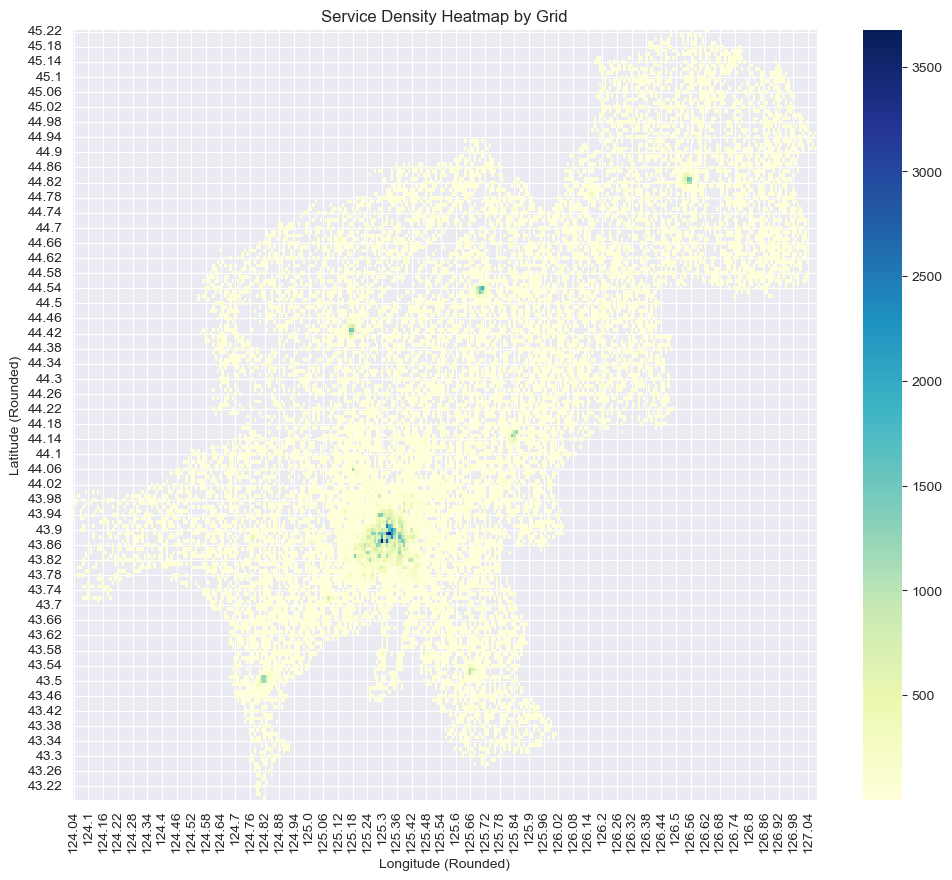

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 创建透视表并排序：`grid_y`按照从大到小排序，以便符合地理方向
grid_pivot = grid_density.pivot(index='grid_y', columns='grid_x', values='facility_count').sort_index(ascending=False)

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(grid_pivot, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Service Density Heatmap by Grid")
plt.xlabel("Longitude (Rounded)")
plt.ylabel("Latitude (Rounded)")



os.makedirs('images', exist_ok=True)
# 保存图片到images文件夹
plt.savefig('images\\S2.jpg')




plt.show()